**Dataset Preprocessing and EDA**
=================================
-----------------------------------------------------
**<span style="color:red">Tom Wright-Anderson</span>**

Importing packages and hiding warnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')

**Dataset loading, checking, and linear correlation analysis**
--------------------------------------------------------------

Loading dataset

In [2]:
dataset_filepath = 'C:/Users/tomwr/Dissertation_Coding/uncleaned_dataset_v2_csv.csv'

In [3]:
date_column = ['Date']
full_dataset = pd.read_csv(dataset_filepath,
                          parse_dates = date_column,
                          dayfirst = True)

Filling missing values in each column using forward fill

In [4]:
full_dataset = full_dataset.fillna(method = 'ffill')

full_dataset.describe()

,SF_absolute_humidity,SF_relative_humidity,SF_mean_air_temperature,SF_atmospheric_pressure,SF_potential_evaporation,SF_net_radiation,SF_volumetric_water_content,SF_soil_temperature,SF_wind_speed,catchment_daily_precipitation_armley,...,river_level_snaygill,river_level_kildwick,river_level_kirkstall,headingley_precipitation,malham_precipitation,skipton_snaygill_precipitation,farnley_hall_precipitation,embsay_precipitation,silsden_precipitation,lower_laithe_precipitation
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,...,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,7.357991,78.979430,9.493592,1007.160918,1.653481,4.263212,29.286392,10.102294,3.409335,3.236646,...,0.885597,0.564778,1.607135,2.263766,4.686709,2.717089,2.252848,3.056171,2.890981,3.434810
std,2.270768,9.374004,5.125165,12.218724,1.216899,5.106635,6.637835,5.774995,1.504664,5.601336,...,0.902367,0.424766,0.153703,4.531877,7.832119,5.268406,4.424261,5.981336,5.378722,6.302176
min,2.600000,44.700000,-4.500000,963.900000,0.100000,-4.700000,13.300000,0.000000,0.800000,0.000000,...,-0.179000,0.083000,1.428000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,72.475000,5.800000,999.000000,0.600000,0.000000,24.075000,5.400000,2.300000,0.027499,...,0.202750,0.273750,1.491000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,78.800000,8.900000,1008.550000,1.300000,3.000000,30.700000,9.000000,3.100000,0.754264,...,0.577500,0.444000,1.561000,0.200000,1.200000,0.400000,0.200000,0.400000,0.400000,0.400000
75%,8.800000,85.700000,13.400000,1015.700000,2.500000,7.825000,34.600000,15.100000,4.200000,4.213675,...,1.267000,0.693250,1.677250,2.400000,6.200000,3.200000,2.400000,3.450000,3.400000,4.200000
max,14.700000,101.200000,24.000000,1038.200000,5.500000,17.900000,45.000000,26.000000,9.300000,43.581806,...,4.286000,3.104000,2.367000,41.000000,85.200000,40.600000,43.400000,74.600000,40.800000,50.400000


Linear correlation analysis of dataset using Spearmans Correlation Coefficient

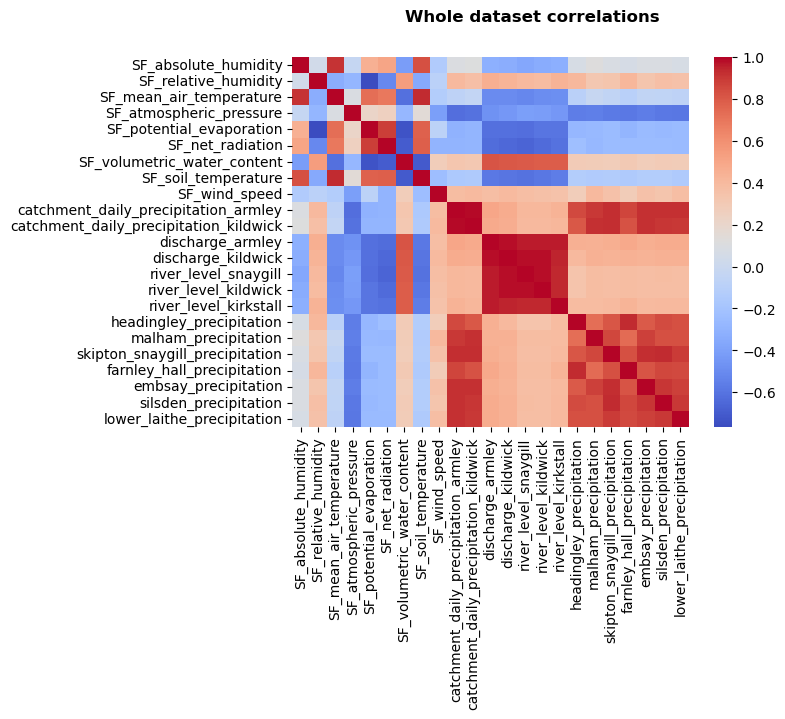

<Figure size 1600x1400 with 0 Axes>

In [5]:
full_dataset_corr = full_dataset.corr(numeric_only = True,
                                     method = 'spearman')

full_dataset_corr_heatmap = sns.heatmap(data = full_dataset_corr,
                                        cbar = True,
                                        cmap = 'coolwarm'
                                       )
plt.suptitle('Whole dataset correlations',
             fontweight = 'bold'
            )
plt.figure(figsize = (16,14))

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/full_dataset_corr_heatmap',
                format = 'jpg')
plt.show(full_dataset_corr_heatmap)
                                        

Producing correlation matrix plots for grouped variables with armley discharge, for clarity

Creating split dataframes and correlations of each

In [6]:
#spen farm hydrometeorlogical variables
sf_and_armley_df = full_dataset[['SF_absolute_humidity',
                                 'SF_relative_humidity',
                                 'SF_mean_air_temperature',
                                 'SF_atmospheric_pressure',
                                 'SF_potential_evaporation',
                                 'SF_net_radiation',
                                 'SF_volumetric_water_content',
                                 'SF_soil_temperature',
                                 'SF_wind_speed',
                                 'discharge_armley'
                                ]]

sf_and_armley_df_corr = sf_and_armley_df.corr(numeric_only = True,
                                     method = 'spearman')

#river level and discharge
river_level_discharge_df = full_dataset[['discharge_kildwick',
                                         'river_level_snaygill',
                                         'river_level_kildwick',
                                         'river_level_kirkstall',
                                         'discharge_armley'
                                        ]]

river_level_discharge_df_corr = river_level_discharge_df.corr(numeric_only = True,
                                                              method = 'spearman')

#precipitation
precipitation_df = full_dataset[['headingley_precipitation',
                                 'malham_precipitation',
                                 'skipton_snaygill_precipitation',
                                 'farnley_hall_precipitation',
                                 'embsay_precipitation',
                                 'silsden_precipitation',
                                 'lower_laithe_precipitation',
                                 'catchment_daily_precipitation_armley',
                                 'catchment_daily_precipitation_kildwick',
                                 'discharge_armley'
                                ]]

precipitation_df_corr = precipitation_df.corr(numeric_only = True,
                                              method = 'spearman')

Plotting separate heatmap plots

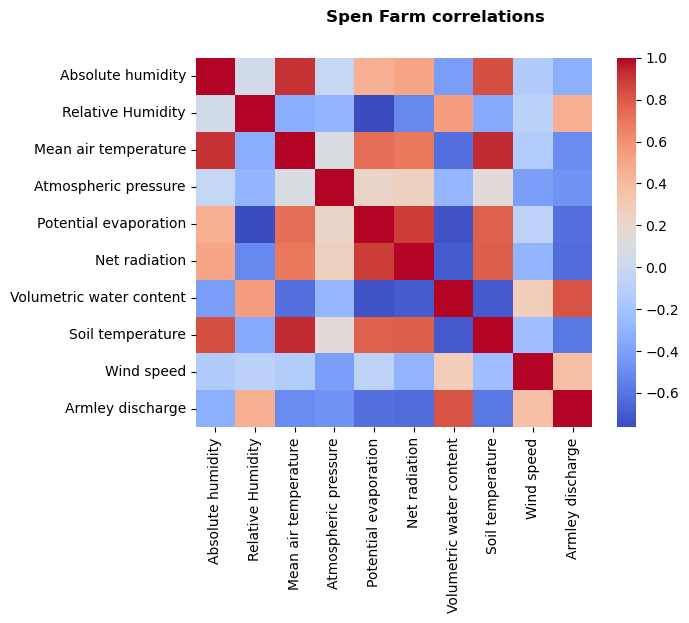

<Figure size 1600x1400 with 0 Axes>

In [7]:
#Spen farm heatmap
sf_and_armley_heatmap = sns.heatmap(data = sf_and_armley_df_corr,
                                        cbar = True,
                                        cmap = 'coolwarm',
                                        xticklabels = ['Absolute humidity',
                                                       'Relative Humidity',
                                                       'Mean air temperature',
                                                       'Atmospheric pressure',
                                                       'Potential evaporation',
                                                       'Net radiation',
                                                       'Volumetric water content',
                                                       'Soil temperature',
                                                       'Wind speed',
                                                       'Armley discharge'
                                                      ],
                                        yticklabels = ['Absolute humidity',
                                                       'Relative Humidity',
                                                       'Mean air temperature',
                                                       'Atmospheric pressure',
                                                       'Potential evaporation',
                                                       'Net radiation',
                                                       'Volumetric water content',
                                                       'Soil temperature',
                                                       'Wind speed',
                                                       'Armley discharge'
                                                      ]
                                   )
plt.suptitle('Spen Farm correlations',
             fontweight = 'bold')
plt.figure(figsize = (16,14))

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/spen_farm_corr_heatmap',
                format = 'jpg')
plt.show(sf_and_armley_heatmap)

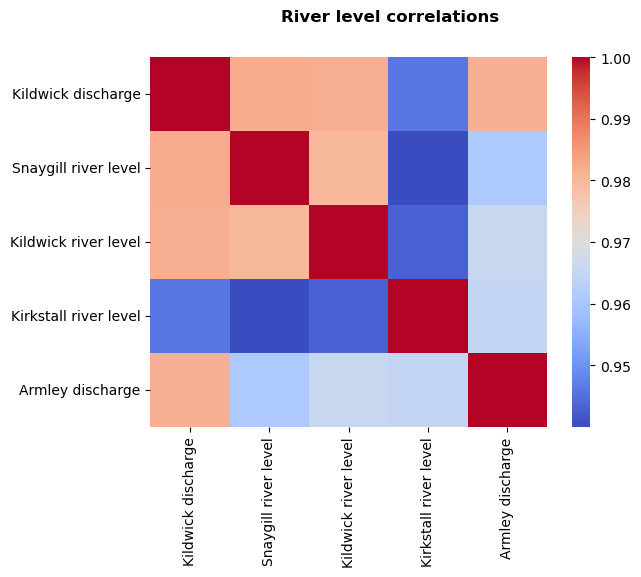

<Figure size 1600x1400 with 0 Axes>

In [8]:
#River level
river_level_heatmap = sns.heatmap(data = river_level_discharge_df_corr,
                                        cbar = True,
                                        cmap = 'coolwarm',
                                        xticklabels = ['Kildwick discharge',
                                                       'Snaygill river level',
                                                       'Kildwick river level',
                                                       'Kirkstall river level',
                                                       'Armley discharge'
                                                      ],
                                        yticklabels = ['Kildwick discharge',
                                                       'Snaygill river level',
                                                       'Kildwick river level',
                                                       'Kirkstall river level',
                                                       'Armley discharge'
                                                      ]
                                 )

                                    
plt.suptitle('River level correlations',
             fontweight = 'bold')
plt.figure(figsize = (16,14))

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/river_level_corr_heatmap',
                format = 'jpg')
plt.show(river_level_heatmap)

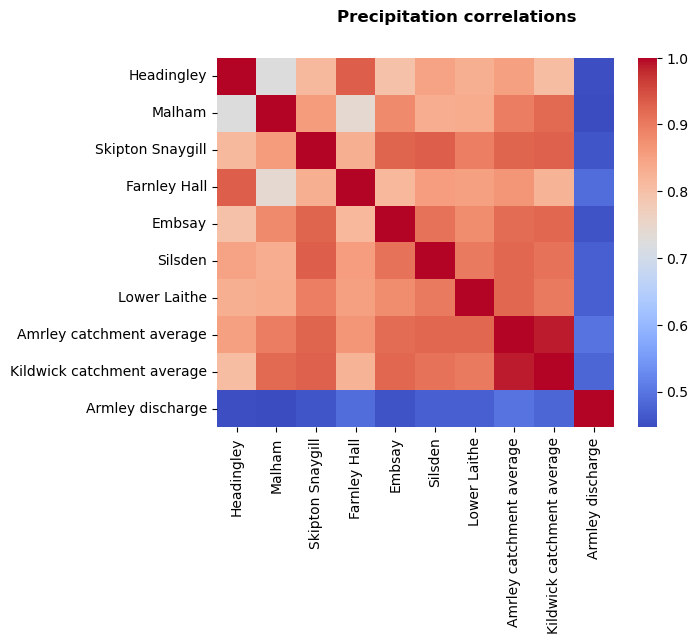

<Figure size 1600x1400 with 0 Axes>

In [9]:
#Precipitation
precipitation_heatmap = sns.heatmap(data = precipitation_df_corr,
                                        cbar = True,
                                        cmap = 'coolwarm',
                                        xticklabels = ['Headingley',
                                                       'Malham',
                                                       'Skipton Snaygill',
                                                       'Farnley Hall',
                                                       'Embsay',
                                                       'Silsden',
                                                       'Lower Laithe',
                                                       'Amrley catchment average',
                                                       'Kildwick catchment average',
                                                       'Armley discharge'
                                                      ],
                                        yticklabels = ['Headingley',
                                                       'Malham',
                                                       'Skipton Snaygill',
                                                       'Farnley Hall',
                                                       'Embsay',
                                                       'Silsden',
                                                       'Lower Laithe',
                                                       'Amrley catchment average',
                                                       'Kildwick catchment average',
                                                       'Armley discharge'
                                                      ]
                                   )

                                    
plt.suptitle('Precipitation correlations',
             fontweight = 'bold')
plt.figure(figsize = (16,14))

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/precipitation_corr_heatmap',
                format = 'jpg')
plt.show(precipitation_heatmap)

**Precipitation**
-----------------

Produce a figure with 9 graphs, 1 for each gauging location, in a 3x3 grid format

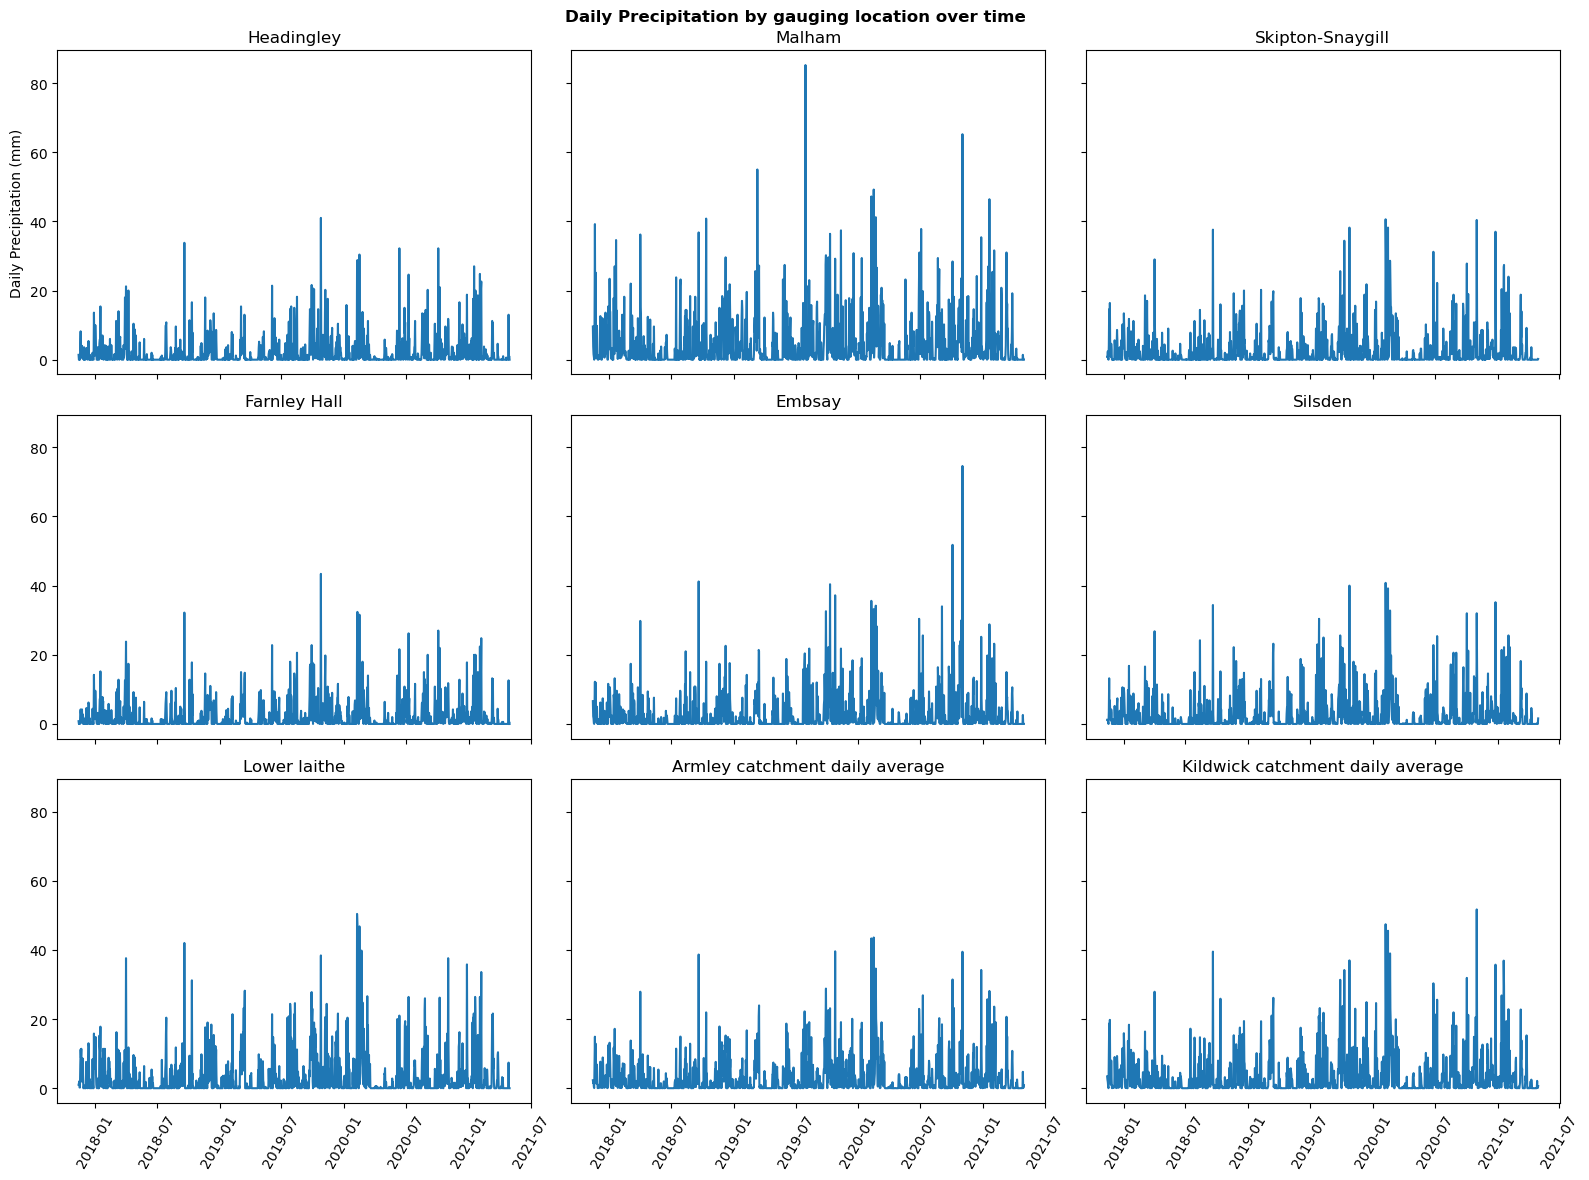

In [10]:
date_col = full_dataset['Date']
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3,
                       sharex = True,
                       sharey = True)

fig.set_size_inches(16,12)
plt.suptitle('Daily Precipitation by gauging location over time',
            fontweight = 'bold')

ax[0, 0].plot(date_col, full_dataset['headingley_precipitation'])
ax[0, 0].set_title('Headingley')
ax[0, 0].set_ylabel('Daily Precipitation (mm)')

ax[0, 1].plot(date_col, full_dataset['malham_precipitation'])
ax[0, 1].set_title('Malham')

ax[0, 2].plot(date_col, full_dataset['skipton_snaygill_precipitation'])
ax[0, 2].set_title('Skipton-Snaygill')

ax[1, 0].plot(date_col, full_dataset['farnley_hall_precipitation'])
ax[1, 0].set_title('Farnley Hall')

ax[1, 1].plot(date_col, full_dataset['embsay_precipitation'])
ax[1, 1].set_title('Embsay')

ax[1, 2].plot(date_col, full_dataset['silsden_precipitation'])
ax[1, 2].set_title('Silsden')

ax[2, 0].plot(date_col, full_dataset['lower_laithe_precipitation'])
ax[2, 0].set_title('Lower laithe')
plt.xticks(rotation = 60)

ax[2, 1].plot(date_col, full_dataset['catchment_daily_precipitation_armley'])
ax[2, 1].set_title('Armley catchment daily average')

ax[2, 2].plot(date_col, full_dataset['catchment_daily_precipitation_kildwick'])
ax[2, 2].set_title('Kildwick catchment daily average')

for ax in ax.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 60)
    

plt.tight_layout()

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/precipitation_over_time_by_location_grid',
                format = 'jpg')
plt.show()


Produce a violin plot depicting the variability in precipitation by gauging location

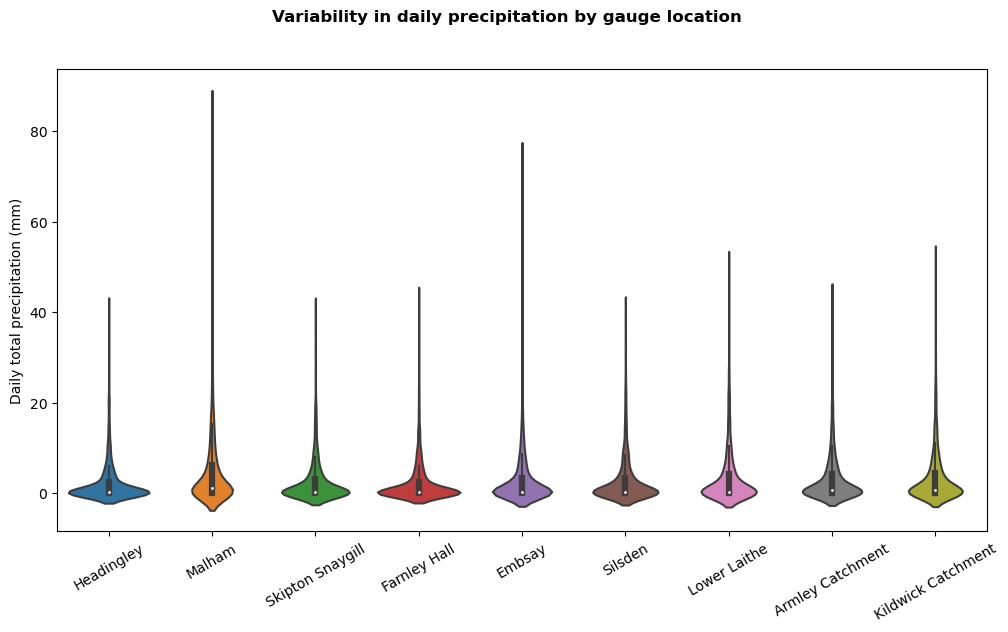

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plt.suptitle('Variability in daily precipitation by gauge location',
            fontweight = 'bold')

sns.violinplot(data = full_dataset[['headingley_precipitation',
                                    'malham_precipitation',
                                    'skipton_snaygill_precipitation',
                                    'farnley_hall_precipitation',
                                    'embsay_precipitation',
                                    'silsden_precipitation',
                                    'lower_laithe_precipitation',
                                    'catchment_daily_precipitation_armley',
                                    'catchment_daily_precipitation_kildwick'
                                   ]])

plt.xticks()
plt.xticks(ticks = ax.get_xticks(),
           labels = ['Headingley',
                     'Malham',
                     'Skipton Snaygill',
                     'Farnley Hall',
                     'Embsay',
                     'Silsden',
                     'Lower Laithe',
                     'Armley Catchment',
                     'Kildwick Catchment'
                    ])
           
plt.xticks(rotation = 30)
    
    
plt.ylabel('Daily total precipitation (mm)')

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/precipitation_by_location_violin',
                format = 'jpg')
plt.show()


**River Levels**
----------------

Produce a figure containing 3 line graphs depicting river levels over the study period. Formatted in a 1x3 grid, with one graph for each river level gauging location.

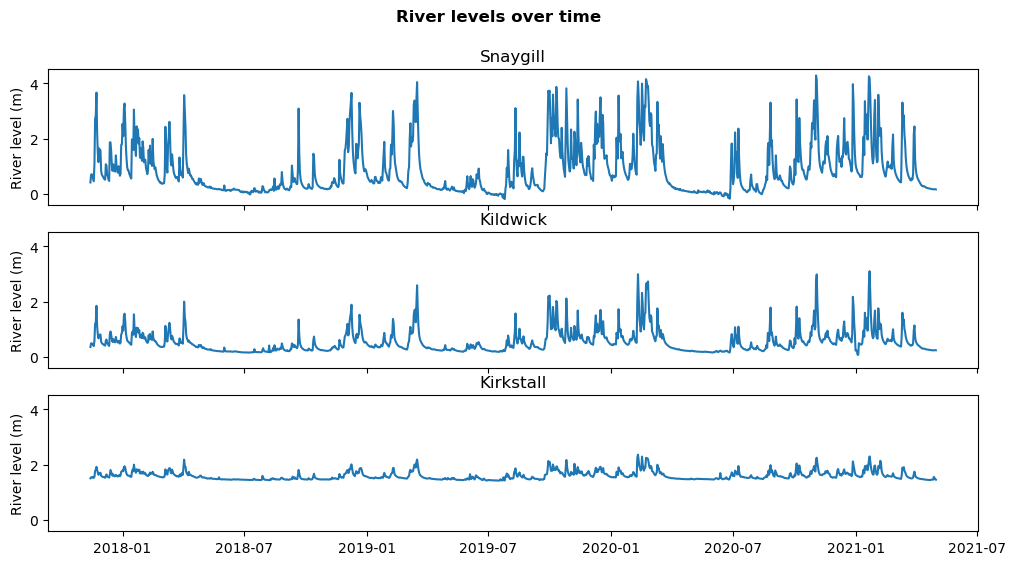

In [12]:
fig, ax = plt.subplots(nrows = 3,
                       ncols = 1,
                       sharex = True, 
                      sharey = True)

fig.set_size_inches(12,6)
plt.suptitle('River levels over time',
             fontweight = 'bold')

ax[0, ].plot(date_col, full_dataset['river_level_snaygill'])
ax[0, ].set_title('Snaygill')
ax[0, ].set_ylabel('River level (m)')

ax[1, ].plot(date_col, full_dataset['river_level_kildwick'])
ax[1, ].set_title('Kildwick')
ax[1, ].set_ylabel('River level (m)')

ax[2, ].plot(date_col, full_dataset['river_level_kirkstall'])
ax[2, ].set_title('Kirkstall')
ax[2, ].set_ylabel('River level (m)')

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/river_level_over_time_by_location_grid',
                format = 'jpg')

plt.show()

Produce a violin plot depicting the variability in river level by gauging location

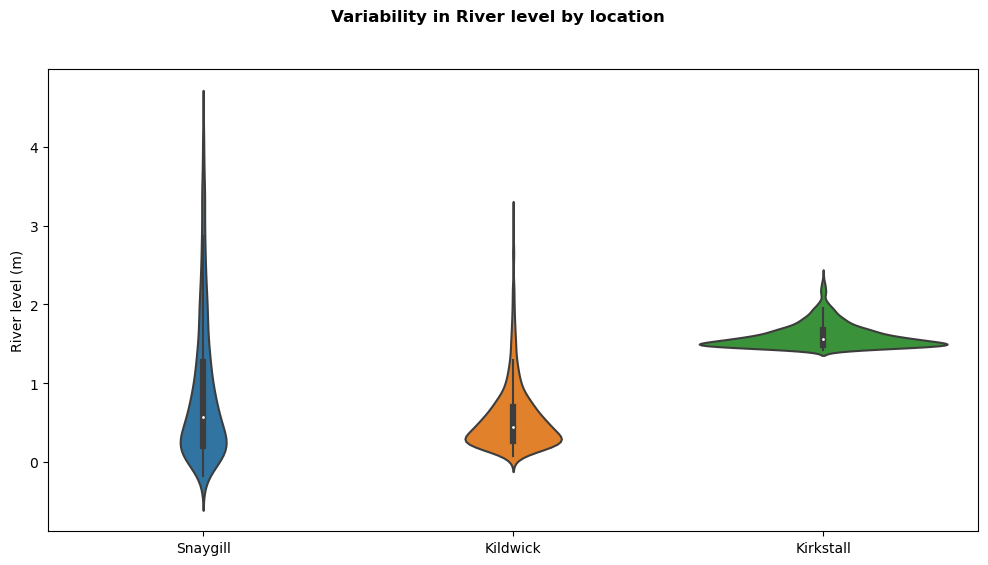

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.suptitle('Variability in River level by location',
             fontweight = 'bold')

sns.violinplot(data = full_dataset[['river_level_snaygill',
                                    'river_level_kildwick',
                                    'river_level_kirkstall'
                                   ]])

plt.xticks(ticks = ax.get_xticks(),
           labels = ['Snaygill',
                     'Kildwick',
                     'Kirkstall'
                    ])
    
    
plt.ylabel('River level (m)')

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/river_level_by_location_violin',
                format = 'jpg')
plt.show()

**Spen Farm (SF) hydrometerological measures**
-----------------------------------------------

Produce a figure containing 9 line graphs depicting Spen Farm hydrometeorological conditions over the study period. Formatted in a 3x3 grid, with one graph for each hydrometeorological variable

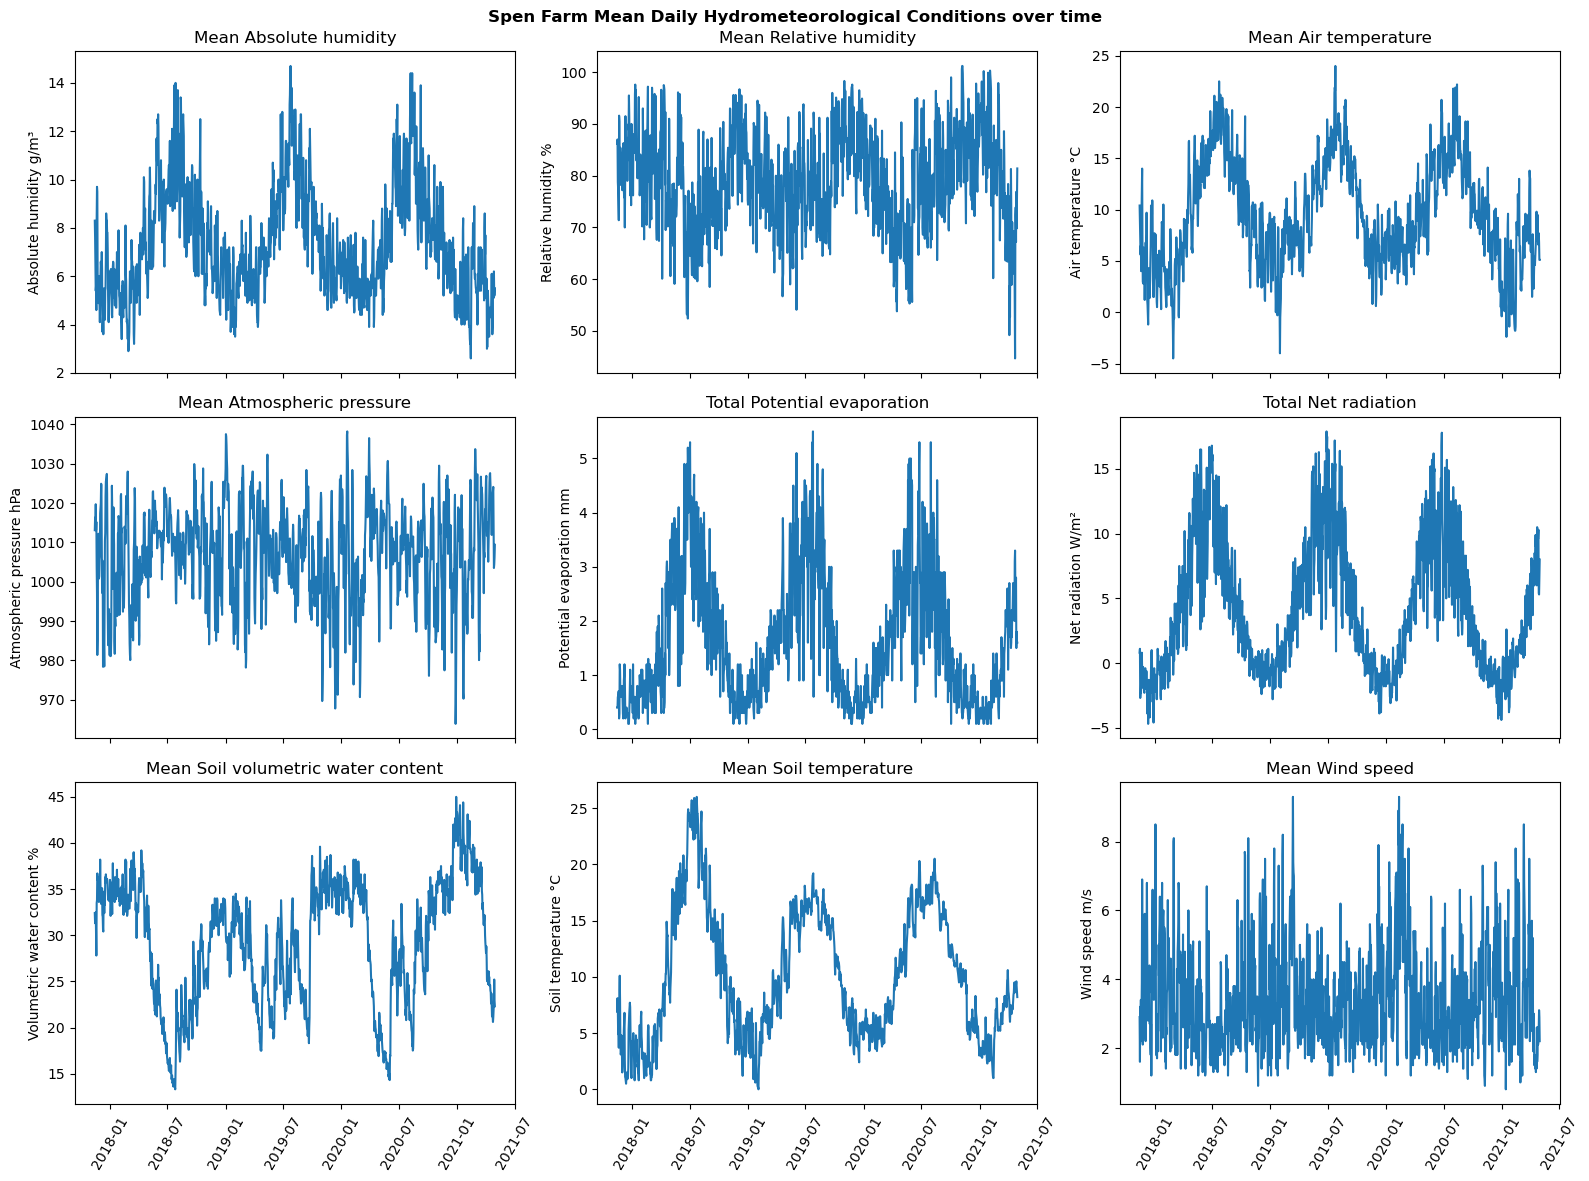

In [14]:
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3,
                       sharex = True,
                       sharey = False
                      )

fig.set_size_inches(16,12)
plt.suptitle('Spen Farm Mean Daily Hydrometeorological Conditions over time',
            fontweight = 'bold')

ax[0, 0].plot(date_col, full_dataset['SF_absolute_humidity'])
ax[0, 0].set_title('Mean Absolute humidity')
ax[0, 0].set_ylabel('Absolute humidity g/m³')

ax[0, 1].plot(date_col, full_dataset['SF_relative_humidity'])
ax[0, 1].set_title('Mean Relative humidity')
ax[0, 1].set_ylabel('Relative humidity %')

ax[0, 2].plot(date_col, full_dataset['SF_mean_air_temperature'])
ax[0, 2].set_title('Mean Air temperature')
ax[0, 2].set_ylabel('Air temperature °C')

ax[1, 0].plot(date_col, full_dataset['SF_atmospheric_pressure'])
ax[1, 0].set_title('Mean Atmospheric pressure')
ax[1, 0].set_ylabel('Atmospheric pressure hPa')

ax[1, 1].plot(date_col, full_dataset['SF_potential_evaporation'])
ax[1, 1].set_title('Total Potential evaporation')
ax[1, 1].set_ylabel('Potential evaporation mm')

ax[1, 2].plot(date_col, full_dataset['SF_net_radiation'])
ax[1, 2].set_title('Total Net radiation')
ax[1, 2].set_ylabel('Net radiation W/m²')

ax[2, 0].plot(date_col, full_dataset['SF_volumetric_water_content'])
ax[2, 0].set_title('Mean Soil volumetric water content')
ax[2, 0].set_ylabel('Volumetric water content %')

ax[2, 1].plot(date_col, full_dataset['SF_soil_temperature'])
ax[2, 1].set_title('Mean Soil temperature')
ax[2, 1].set_ylabel('Soil temperature °C')

ax[2, 2].plot(date_col, full_dataset['SF_wind_speed'])
ax[2, 2].set_title('Mean Wind speed')
ax[2, 2].set_ylabel('Wind speed m/s')

for ax in ax.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 60)

plt.tight_layout()

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/spen_farm_hydrometeorological_variables_over_time_grid',
                format = 'jpg')
plt.show()

Produce a figure containing all Spen Farm variables in a 3x3 plot grid. Each plot is a violin plot of one variable 

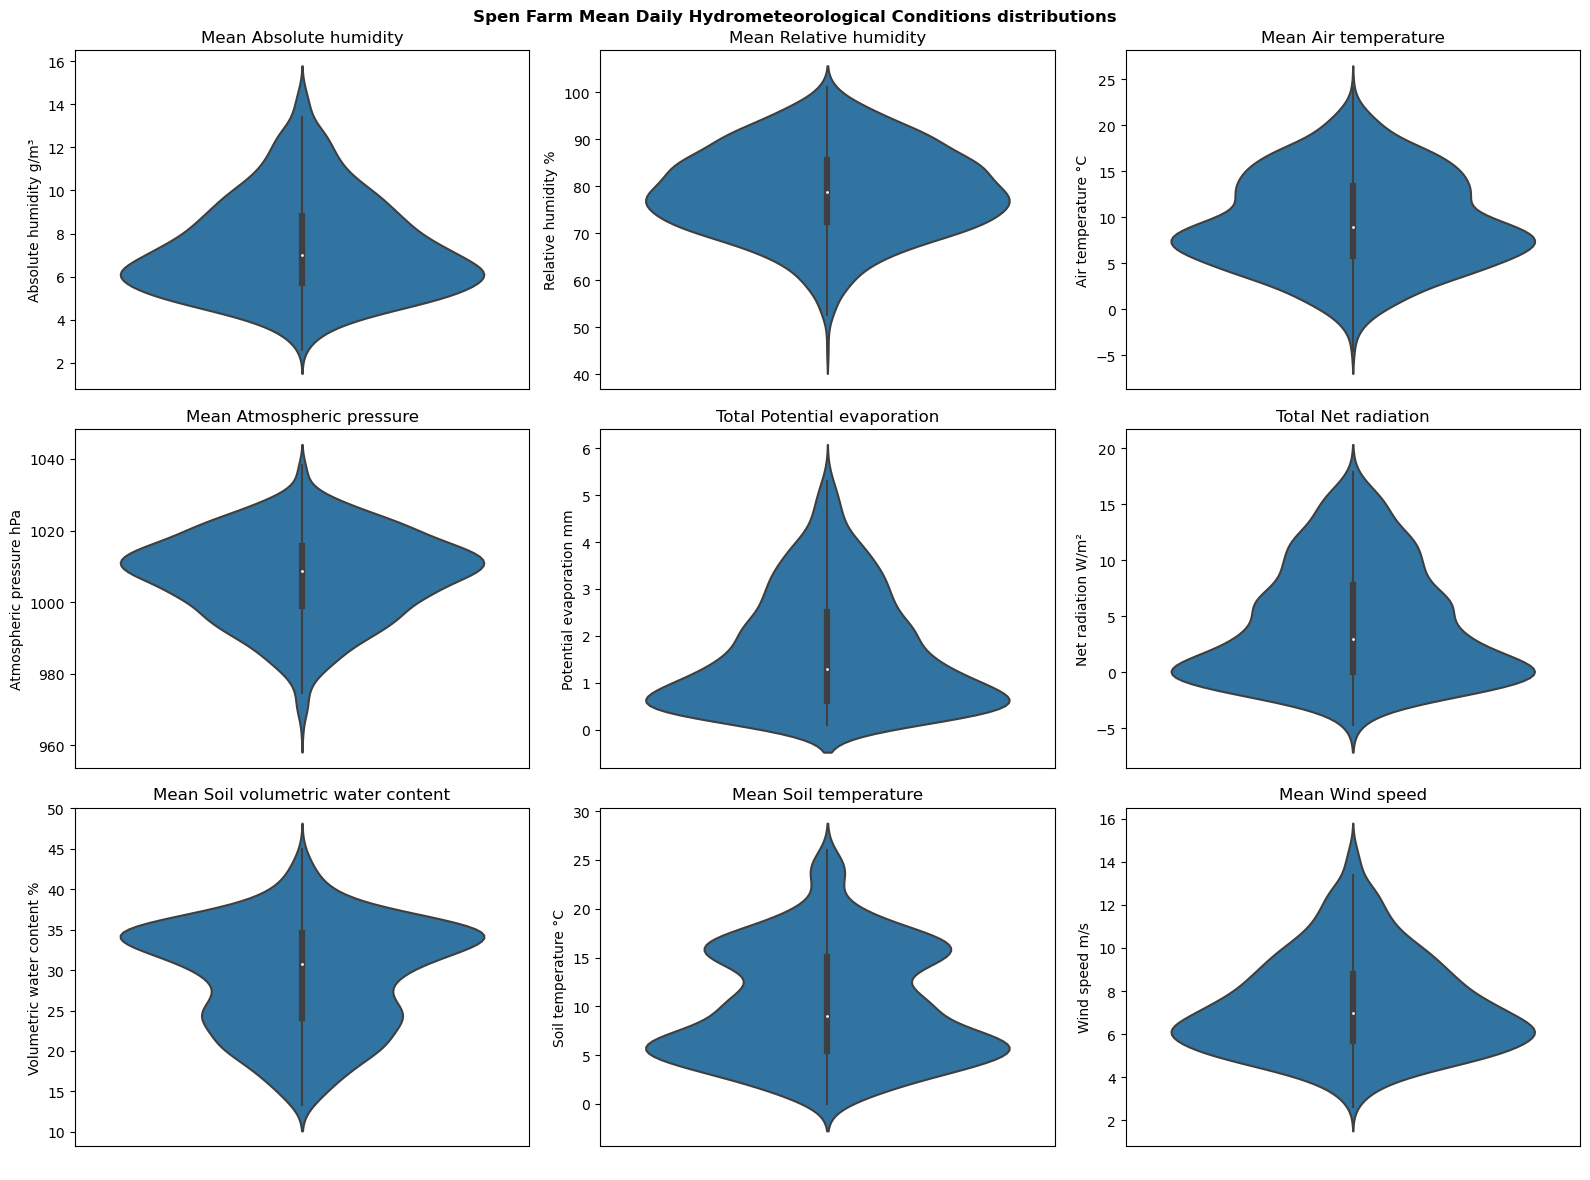

In [15]:
fig, ax = plt.subplots(nrows = 3,
                       ncols = 3,
                       sharex = True,
                       sharey = False
                      )

fig.set_size_inches(16,12)
plt.suptitle('Spen Farm Mean Daily Hydrometeorological Conditions distributions',
            fontweight = 'bold')

sns.violinplot(data = full_dataset['SF_absolute_humidity'], ax = ax[0, 0])
ax[0, 0].set_title('Mean Absolute humidity')
ax[0, 0].set_ylabel('Absolute humidity g/m³')

sns.violinplot(data = full_dataset['SF_relative_humidity'], ax = ax[0, 1])
ax[0, 1].set_title('Mean Relative humidity')
ax[0, 1].set_ylabel('Relative humidity %')

sns.violinplot(data = full_dataset['SF_mean_air_temperature'], ax = ax[0, 2])
ax[0, 2].set_title('Mean Air temperature')
ax[0, 2].set_ylabel('Air temperature °C')

sns.violinplot(data = full_dataset['SF_atmospheric_pressure'], ax = ax[1, 0])
ax[1, 0].set_title('Mean Atmospheric pressure')
ax[1, 0].set_ylabel('Atmospheric pressure hPa')

sns.violinplot(data = full_dataset['SF_potential_evaporation'], ax = ax[1, 1])
ax[1, 1].set_title('Total Potential evaporation')
ax[1, 1].set_ylabel('Potential evaporation mm')

sns.violinplot(data = full_dataset['SF_net_radiation'], ax = ax[1, 2])
ax[1, 2].set_title('Total Net radiation')
ax[1, 2].set_ylabel('Net radiation W/m²')

sns.violinplot(data = full_dataset['SF_volumetric_water_content'], ax = ax[2, 0])
ax[2, 0].set_title('Mean Soil volumetric water content')
ax[2, 0].set_ylabel('Volumetric water content %')

sns.violinplot(data = full_dataset['SF_soil_temperature'], ax = ax[2, 1])
ax[2, 1].set_title('Mean Soil temperature')
ax[2, 1].set_ylabel('Soil temperature °C')

sns.violinplot(data = full_dataset['SF_absolute_humidity'], ax = ax[2, 2])
ax[2, 2].set_title('Mean Wind speed')
ax[2, 2].set_ylabel('Wind speed m/s')


for ax in ax.flatten():
    plt.sca(ax)
    plt.tick_params('x',
                color = 'white',
                labelcolor = 'white'
               )

plt.tight_layout()

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/spen_farm_hydrometeorological_variable_violin_grid',
                format = 'jpg')
plt.show()

**Discharge**
-------------

Produce a figure containing 2 line graphs depicting discharge over the study period. Formatted in a 1x2 grid, with one graph for each discharge gauging location

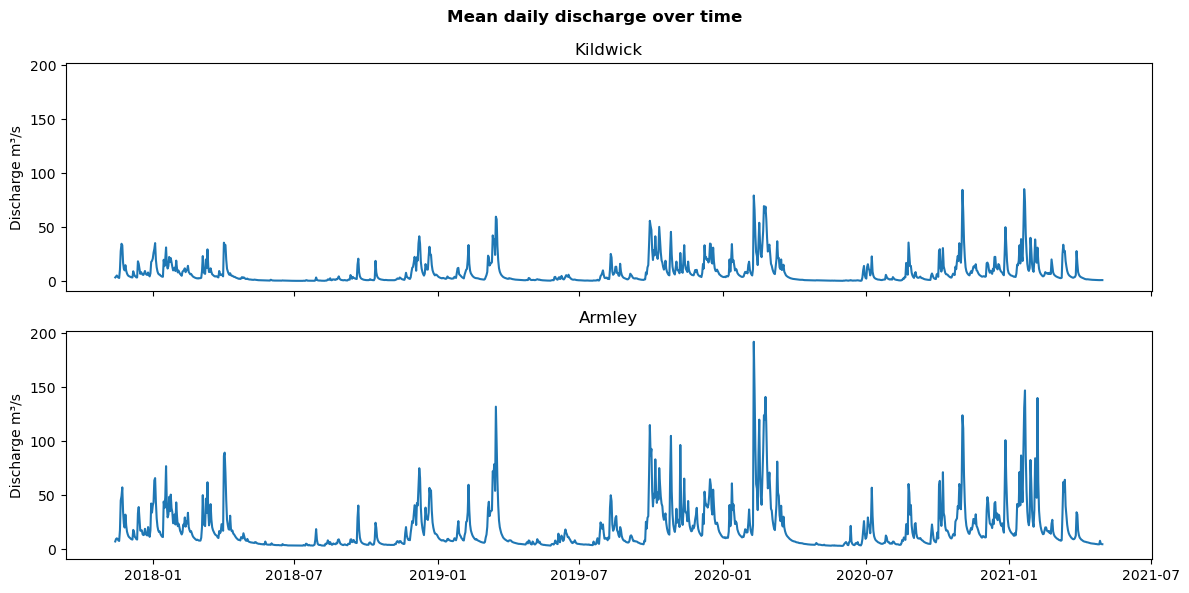

In [16]:
fig, ax = plt.subplots(nrows = 2,
                       ncols = 1,
                       sharex = True,
                       sharey = True
                      )
fig.set_size_inches(12,6)
plt.suptitle('Mean daily discharge over time',
             fontweight = 'bold')
             

ax[0, ].plot(date_col, full_dataset['discharge_kildwick'])
ax[0, ].set_title('Kildwick')
ax[0, ].set_ylabel('Discharge m³/s')
                

ax[1, ].plot(date_col, full_dataset['discharge_armley'])
ax[1, ].set_title('Armley')
ax[1, ].set_ylabel('Discharge m³/s')


plt.tight_layout()

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/discharge_over_time_by_location_grid',
                format = 'jpg')
plt.show()                 

Produce a single line graph with dual axes (precipitation and discharge). Plotting discharge at Armley and Kildwick, overlayed with daily catchment rainfall at Armley and Kildwick in a lighter colour.

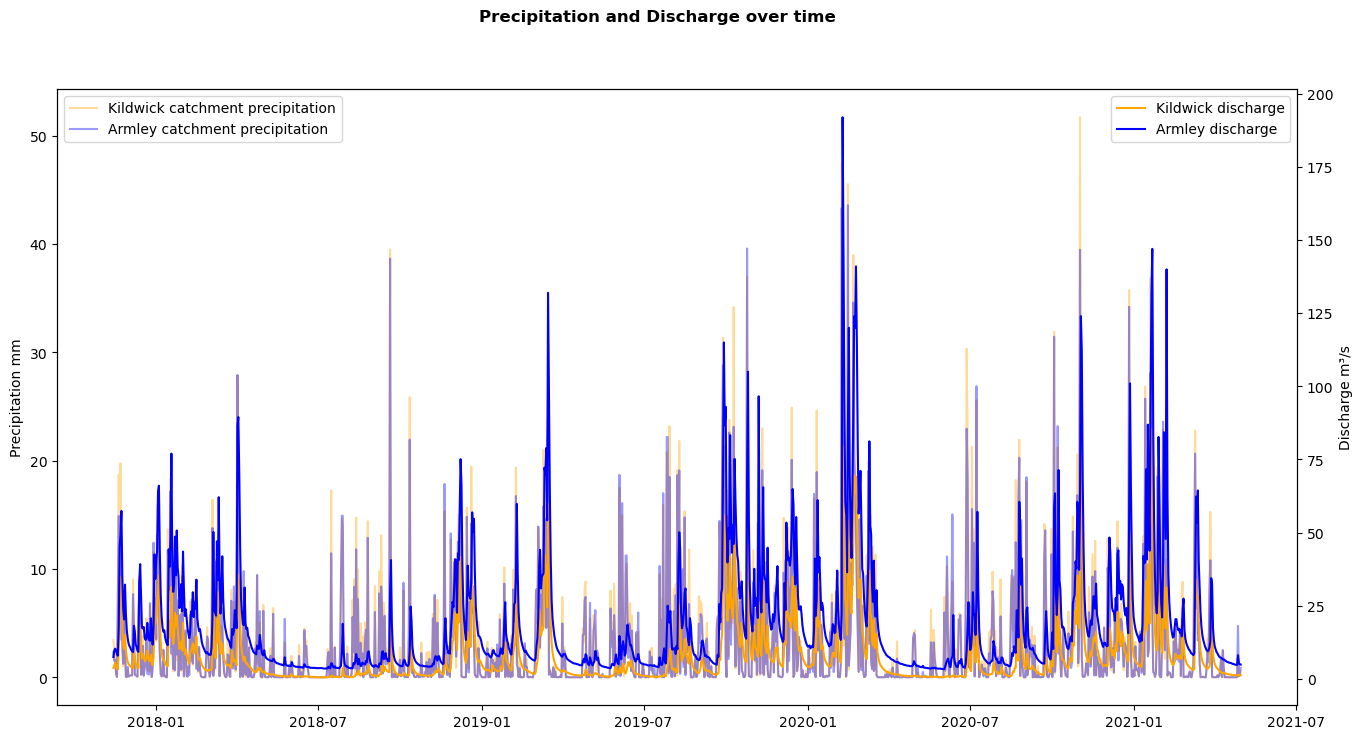

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
plt.suptitle('Precipitation and Discharge over time',
            fontweight = 'bold')

ax.set_ylabel('Precipitation mm')
ax2 = ax.twinx()
ax2.set_ylabel('Discharge m³/s')

ax.plot(date_col, full_dataset['catchment_daily_precipitation_kildwick'],
         alpha = 0.4,
         color = 'orange',
         label = 'Kildwick catchment precipitation'
        )
ax2.plot(date_col, full_dataset['discharge_kildwick'],
         alpha = 1.0,
         color = 'orange',
         label = 'Kildwick discharge'
        )
ax.plot(date_col, full_dataset['catchment_daily_precipitation_armley'],
         alpha = 0.4,
         color = 'blue',
         label = 'Armley catchment precipitation'
        )
ax2.plot(date_col, full_dataset['discharge_armley'],
         alpha = 1.0,
         color = 'blue',
         label = 'Armley discharge'
        )

ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.legend()

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/precipitation_and_discharge_over_time',
                format = 'jpg')
plt.show()

Produce a violin plot depicting the variability in discharge by gauging location

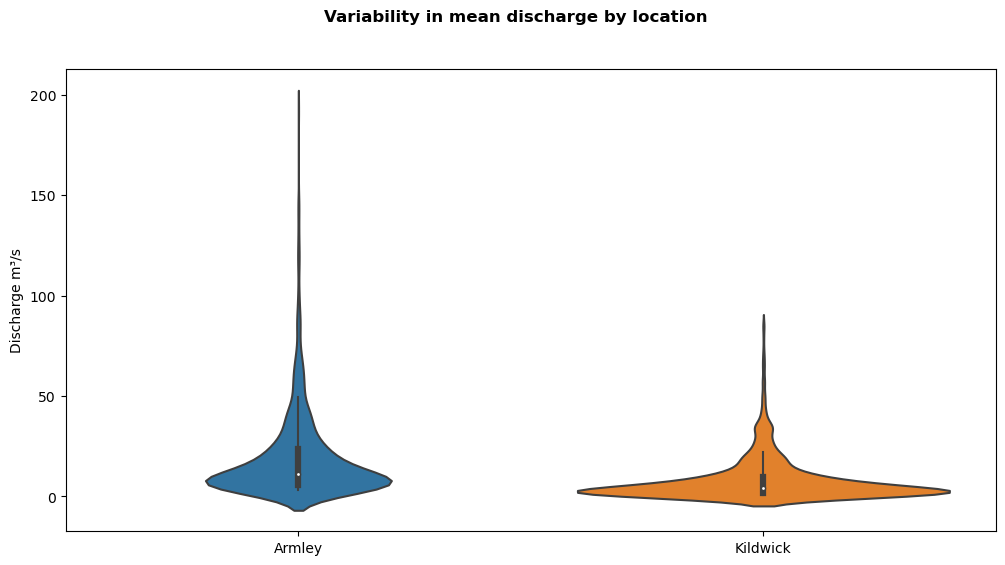

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

plt.suptitle('Variability in mean discharge by location',
            fontweight = 'bold')

sns.violinplot(data = full_dataset[['discharge_armley',
                                    'discharge_kildwick'
                                   ]])
plt.xticks(ticks = ax.get_xticks(),
           labels = ['Armley',
                     'Kildwick'
                    ])

plt.ylabel('Discharge m³/s')


plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/discharge_by_location_violin',
                format = 'jpg')
plt.show()

Produce a joint plot comparing discharge between gauging locations - scatterplot of discharge values, histograms for discharge value density.

<Figure size 1200x600 with 0 Axes>

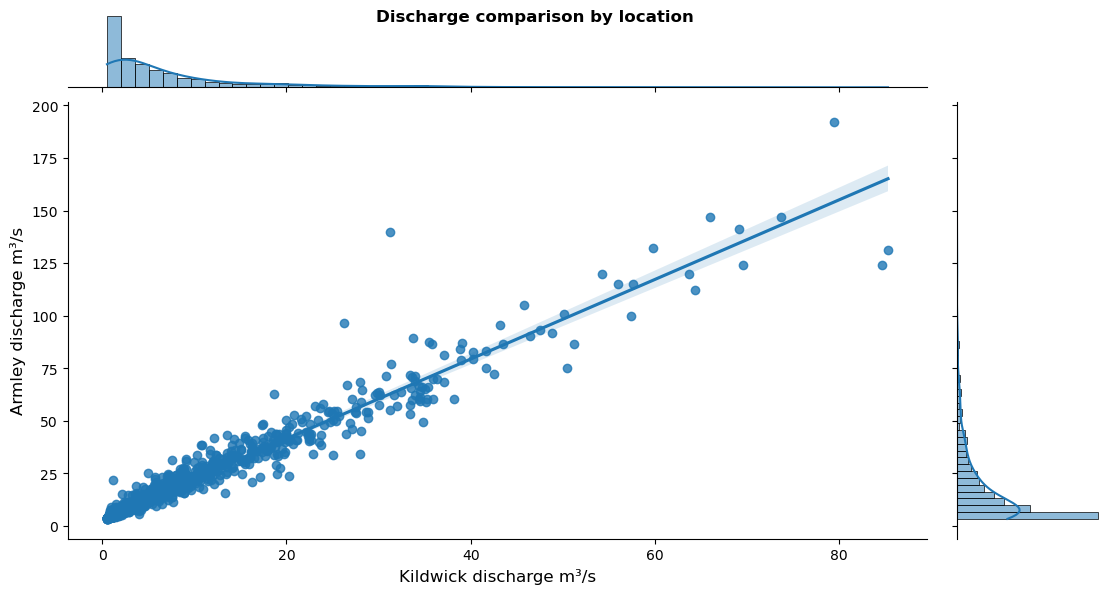

In [19]:
plt.figure(figsize = (12, 6))

discharge_jointplot = sns.jointplot(data = full_dataset,
                                    x = 'discharge_kildwick',
                                    y = 'discharge_armley',
                                    kind = 'reg')
discharge_jointplot.fig.suptitle('Discharge comparison by location',
                                fontweight = 'bold')
discharge_jointplot.set_axis_labels('Kildwick discharge m³/s',
                                    'Armley discharge m³/s',
                                    fontsize = 12
                                   )

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.savefig(fname = 'D:/Year 3/GEOG3605 - Dissertation/EDA_graphs/discharge_by_location_comparison_line',
                format = 'jpg')
plt.show()